## Image to DF

In [1]:
import os
import pandas as pd

In [ ]:
tile_df = pd.DataFrame(columns=['image_name', 'label', 'no_tiles'])
lung_df = pd.DataFrame(columns=['image_name', 'label', 'tvt', 'image_link', 'x_pos', 'y_pos'])

TEMP_DIR = ['Solid_Tissue_Normal', 'TCGA-LUAD', 'TCGA-LUSC']

for t in TEMP_DIR:
    ls = os.listdir(t)
    image_names = []
    labels = []
    tvts = []
    image_links = []
    x_poss = []
    y_poss = []
    for l in ls:
        image_name = l
        label = t
        tvt = l.split('_')[0]
        x_pos = l.split('_')[2]
        y_pos = l.split('_')[3].replace('.jpeg', '')
        image_link = os.readlink(os.path.join(t, l))
        image_names.append(image_name)
        labels.append(label)
        tvts.append(tvt)
        image_links.append(image_link)
        x_poss.append(x_pos)
        y_poss.append(y_pos)
lung_df = lung_df.append(pd.DataFrame({'image_name':image_names, 'label':labels, 'tvt': tvts,
'image_link':image_links, 'x_pos':x_poss, 'y_pos':y_poss}))

lung_df.to_csv('lung_5.csv', index=False)

In [ ]:
tile_df.to_csv('lung_5.csv', index=False)

Lung 5 Count

In [8]:
lung5_9 = pd.read_csv('../data/lung_5.csv')
lung5_1 = pd.read_csv('../data/lung_5_1.csv')
lung5_2 = pd.read_csv('../data/lung_5_2.csv')
lung20 = pd.read_csv('../data/lung_20_filter.csv')

In [4]:
lung5_9.groupby(['label', 'tvt']).count()['image_name']

label                tvt  
Solid_Tissue_Normal  test      131
                     train     456
                     valid     154
TCGA-LUAD            test      392
                     train    1841
                     valid     385
TCGA-LUSC            test      395
                     train    1760
                     valid     387
Name: image_name, dtype: int64

In [6]:
lung5_1.groupby(['label', 'tvt']).count()['image_name']

label                tvt  
Solid_Tissue_Normal  test      199
                     train     718
                     valid     315
TCGA-LUAD            test      306
                     train     972
                     valid     254
TCGA-LUSC            test      414
                     train    1725
                     valid     424
Name: image_name, dtype: int64

In [7]:
lung5_2.groupby(['label', 'tvt']).count()['image_name']

label                tvt  
Solid_Tissue_Normal  test      101
                     train     374
                     valid     147
TCGA-LUAD            test      257
                     train    1097
                     valid     238
TCGA-LUSC            test      374
                     train    1759
                     valid     462
Name: image_name, dtype: int64

In [9]:
lung20.groupby(['label', 'tvt']).count()['image_name']

label                tvt  
Solid_Tissue_Normal  test      1686
                     train     8367
                     valid     2100
TCGA-LUAD            test      8474
                     train    23068
                     valid     6519
TCGA-LUSC            test      5767
                     train    25219
                     valid     5548
Name: image_name, dtype: int64

### Augmentation

In [5]:
import albumentations as A
import cv2
import random
import matplotlib.pyplot as plt

In [1]:
def get_lung_transforms(*, augment, img_size):
    transforms_train = A.Compose([
    A.SmallestMaxSize(max_size=img_size),
    A.Transpose(p=0.5),
    A.VerticalFlip(p=0.5),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.75),
    
    A.Resize(img_size, img_size),
    
    A.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225],
    )
    ])

    transforms_val = A.Compose([
        A.Resize(img_size, img_size),
        A.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225],
        )
    ])

    if augment == 'augment':
        return transforms_train
    else:
        return transforms_val

In [3]:
lung5 = pd.read_csv('/home/ubuntu/workspace/vision.pjt/data/lung_5_local.csv')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


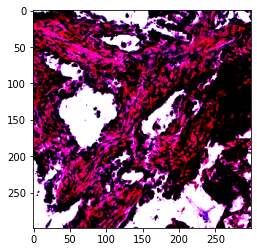

In [6]:
file_path = random.sample(lung5['new_link'].tolist(), 1)[0]

image = cv2.imread(file_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Augment an image
transform_fn = get_lung_transforms(augment='augment', img_size=299)
transformed = transform_fn(image=image)
transformed_image = transformed["image"]

plt.imshow(transformed_image)



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
ipykernel_launcher:23: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


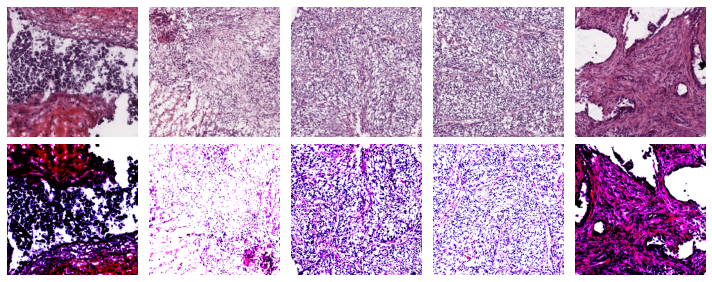

In [7]:
nrows = 2
ncols = 5
total = random.sample(lung5['new_link'].tolist(), 5)
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 4))
for i, axi in enumerate(ax.flat):
    rowid = i // ncols
    colid = i % ncols
    if rowid == 0:
        file_path = total[i]
        image = cv2.imread(file_path)
        img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    else:
        file_path = total[i-5]
        image = cv2.imread(file_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        # Augment an image
        transform_fn = get_lung_transforms(augment='augment', img_size=299)
        transformed = transform_fn(image=image)
        img = transformed["image"]
    axi.axis('off')
    axi.imshow(img)
plt.axis('off')
plt.tight_layout(True)
plt.show()
#plt.savefig('hairy.png', dpi=300)

### Result

In [12]:
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix, classification_report

In [2]:
## lung5_1
in3_1 = pd.read_csv('/home/ubuntu/workspace/vision.pjt/eval.lung/lung5_1/20210613-081648-inception_v3/result_inception_v3_lung.csv')
vit_1 = pd.read_csv('/home/ubuntu/workspace/vision.pjt/eval.lung/lung5_1/20210613-084738-vit_base_patch16_224/result_vit_base_patch16_224_lung.csv')
pit_1 = pd.read_csv('/home/ubuntu/workspace/vision.pjt/eval.lung/lung5_1/20210613-091517-pit_b_224/result_pit_b_224_lung.csv')

## lung5_2
in3_2 = pd.read_csv('/home/ubuntu/workspace/vision.pjt/eval.lung/lung5_2/20210613-100631-inception_v3/result_inception_v3_lung.csv')
vit_2 = pd.read_csv('/home/ubuntu/workspace/vision.pjt/eval.lung/lung5_2/20210613-114420-vit_base_patch16_224/result_vit_base_patch16_224_lung.csv')
pit_2 = pd.read_csv('/home/ubuntu/workspace/vision.pjt/eval.lung/lung5_2/20210613-161720-pit_b_224/result_pit_b_224_lung.csv')

## lung5_3
in3_3 = pd.read_csv('/home/ubuntu/workspace/vision.pjt/eval.lung/lung5_3/20210613-090745-inception_v3/result_inception_v3_lung.csv')
vit_3 = pd.read_csv('/home/ubuntu/workspace/vision.pjt/eval.lung/lung5_3/20210613-154728-vit_base_patch16_224/result_vit_base_patch16_224_lung.csv')
pit_3 = pd.read_csv('/home/ubuntu/workspace/vision.pjt/eval.lung/lung5_3/20210613-154728-pit_b_224/result_pit_b_224_lung.csv')


In [13]:
print(classification_report(in3_1['true'], in3_1['pred']))
print(multilabel_confusion_matrix(in3_1['true'], in3_1['pred']))

              precision    recall  f1-score   support

           0       0.16      0.07      0.10       131
           1       0.48      0.44      0.46       392
           2       0.48      0.60      0.53       395

    accuracy                           0.46       918
   macro avg       0.37      0.37      0.36       918
weighted avg       0.43      0.46      0.44       918

[[[739  48]
  [122   9]]

 [[337 189]
  [219 173]]

 [[262 261]
  [157 238]]]


In [14]:
print(classification_report(vit_1['true'], vit_1['pred']))
print(multilabel_confusion_matrix(vit_1['true'], vit_1['pred']))

              precision    recall  f1-score   support

           0       0.21      0.21      0.21       131
           1       0.58      0.17      0.26       392
           2       0.42      0.73      0.54       395

    accuracy                           0.41       918
   macro avg       0.40      0.37      0.33       918
weighted avg       0.46      0.41      0.37       918

[[[685 102]
  [104  27]]

 [[478  48]
  [327  65]]

 [[134 389]
  [108 287]]]


In [15]:
print(classification_report(pit_1['true'], pit_1['pred']))
print(multilabel_confusion_matrix(pit_1['true'], pit_1['pred']))

              precision    recall  f1-score   support

           0       0.25      0.04      0.07       131
           1       0.50      0.54      0.52       392
           2       0.57      0.68      0.62       395

    accuracy                           0.53       918
   macro avg       0.44      0.42      0.40       918
weighted avg       0.49      0.53      0.50       918

[[[772  15]
  [126   5]]

 [[314 212]
  [179 213]]

 [[318 205]
  [127 268]]]


In [16]:
print(classification_report(in3_2['true'], in3_2['pred']))
print(multilabel_confusion_matrix(in3_2['true'], in3_2['pred']))

              precision    recall  f1-score   support

           0       0.23      0.09      0.13       300
           1       0.38      0.25      0.30       563
           2       0.48      0.70      0.57       788

    accuracy                           0.44      1651
   macro avg       0.36      0.35      0.33      1651
weighted avg       0.40      0.44      0.40      1651

[[[1258   93]
  [ 273   27]]

 [[ 859  229]
  [ 424  139]]

 [[ 255  608]
  [ 233  555]]]


In [17]:
print(classification_report(vit_2['true'], vit_2['pred']))
print(multilabel_confusion_matrix(vit_2['true'], vit_2['pred']))

              precision    recall  f1-score   support

           0       0.33      0.02      0.04       300
           1       0.33      0.18      0.23       563
           2       0.47      0.80      0.59       788

    accuracy                           0.44      1651
   macro avg       0.38      0.33      0.29      1651
weighted avg       0.40      0.44      0.37      1651

[[[1339   12]
  [ 294    6]]

 [[ 883  205]
  [ 464   99]]

 [[ 162  701]
  [ 160  628]]]


In [18]:
print(classification_report(pit_2['true'], pit_2['pred']))
print(multilabel_confusion_matrix(pit_2['true'], pit_2['pred']))

              precision    recall  f1-score   support

           0       0.47      0.29      0.36       300
           1       0.52      0.38      0.44       563
           2       0.56      0.74      0.63       788

    accuracy                           0.54      1651
   macro avg       0.51      0.47      0.48      1651
weighted avg       0.53      0.54      0.52      1651

[[[1253   98]
  [ 213   87]]

 [[ 886  202]
  [ 347  216]]

 [[ 397  466]
  [ 206  582]]]


In [19]:
print(classification_report(in3_3['true'], in3_3['pred']))
print(multilabel_confusion_matrix(in3_3['true'], in3_3['pred']))

              precision    recall  f1-score   support

           0       0.21      0.05      0.08       431
           1       0.41      0.32      0.36       955
           2       0.46      0.67      0.55      1183

    accuracy                           0.44      2569
   macro avg       0.36      0.35      0.33      2569
weighted avg       0.40      0.44      0.40      2569

[[[2059   79]
  [ 410   21]]

 [[1173  441]
  [ 646  309]]

 [[ 463  923]
  [ 387  796]]]


In [20]:
print(classification_report(vit_3['true'], vit_3['pred']))
print(multilabel_confusion_matrix(vit_3['true'], vit_3['pred']))

              precision    recall  f1-score   support

           0       0.44      0.19      0.27       431
           1       0.63      0.41      0.49       955
           2       0.54      0.81      0.65      1183

    accuracy                           0.56      2569
   macro avg       0.54      0.47      0.47      2569
weighted avg       0.56      0.56      0.53      2569

[[[2033  105]
  [ 347   84]]

 [[1388  226]
  [ 567  388]]

 [[ 578  808]
  [ 225  958]]]


In [21]:
print(classification_report(pit_3['true'], pit_3['pred']))
print(multilabel_confusion_matrix(pit_3['true'], pit_3['pred']))

              precision    recall  f1-score   support

           0       0.51      0.30      0.38       431
           1       0.56      0.50      0.53       955
           2       0.58      0.71      0.64      1183

    accuracy                           0.57      2569
   macro avg       0.55      0.51      0.52      2569
weighted avg       0.56      0.57      0.55      2569

[[[2013  125]
  [ 301  130]]

 [[1233  381]
  [ 477  478]]

 [[ 776  610]
  [ 338  845]]]


In [11]:
## lung5_1
in3_1_tile = pd.read_csv('/home/ubuntu/workspace/vision.pjt/eval.lung/lung5_1/20210613-081648-inception_v3/tile_inception_v3_lung.csv')
vit_1_tile = pd.read_csv('/home/ubuntu/workspace/vision.pjt/eval.lung/lung5_1/20210613-084738-vit_base_patch16_224/tile_vit_base_patch16_224_lung.csv')
pit_1_tile = pd.read_csv('/home/ubuntu/workspace/vision.pjt/eval.lung/lung5_1/20210613-091517-pit_b_224/tile_pit_b_224_lung.csv')

## lung5_2
in3_2_tile = pd.read_csv('/home/ubuntu/workspace/vision.pjt/eval.lung/lung5_2/20210613-100631-inception_v3/tile_inception_v3_lung.csv')
vit_2_tile = pd.read_csv('/home/ubuntu/workspace/vision.pjt/eval.lung/lung5_2/20210613-114420-vit_base_patch16_224/tile_vit_base_patch16_224_lung.csv')
pit_2_tile = pd.read_csv('/home/ubuntu/workspace/vision.pjt/eval.lung/lung5_2/20210613-161720-pit_b_224/tile_pit_b_224_lung.csv')

## lung5_3
in3_3_tile = pd.read_csv('/home/ubuntu/workspace/vision.pjt/eval.lung/lung5_3/20210613-090745-inception_v3/tile_inception_v3_lung.csv')
vit_3_tile = pd.read_csv('/home/ubuntu/workspace/vision.pjt/eval.lung/lung5_3/20210613-154728-vit_base_patch16_224/tile_vit_base_patch16_224_lung.csv')
pit_3_tile = pd.read_csv('/home/ubuntu/workspace/vision.pjt/eval.lung/lung5_3/20210613-154728-pit_b_224/tile_pit_b_224_lung.csv')


In [23]:
in3_3_tile

,image_name,correct,total,percent
0,TCGA-05-4417-01A-01-BS1.77504096-c1dd-4bbf-ab1...,28,79,0.3544
1,TCGA-05-5423-01A-01-BS1.8bc9274f-19c8-4ffe-a78...,13,55,0.2364
2,TCGA-18-3421-01A-01-TS1.de5fc45f-2235-460b-8c7...,59,98,0.6020
3,TCGA-21-1076-01A-01-TS1.545d266b-d86f-4f83-8f5...,40,49,0.8163
4,TCGA-21-1082-01A-01-BS1.90b26544-b47c-4883-a01...,51,76,0.6711
5,TCGA-21-1083-01A-01-BS1.fe5654ea-6b67-449d-97f...,61,103,0.5922
6,TCGA-21-5782-01A-01-BS1.13cb3e31-9795-44a0-8f7...,12,15,0.8000
7,TCGA-22-1005-01A-01-BS1.c7e59cb0-62ee-4730-a8c...,4,5,0.8000
8,TCGA-22-4599-01A-01-BS1.76f80cbb-6e71-48e6-898...,7,17,0.4118
9,TCGA-22-5471-01A-01-TS1.f9d42f8b-2c59-4811-97d...,96,113,0.8496


In [3]:
vit_3

,image_name,label,tvt,image_link,x_pos,y_pos,image_uq,true,pred,prob_0,prob_1,prob_2
0,test_TCGA-66-2759-11A-01-BS1.d509fc55-06c7-4fb...,Solid_Tissue_Normal,test,/content/gdrive/My Drive/Colab Notebooks/DeepP...,4,12,TCGA-66-2759-11A-01-BS1.d509fc55-06c7-4fb7-9c4...,0,1,0.2046,0.4635,0.3319
1,test_TCGA-66-2759-11A-01-BS1.d509fc55-06c7-4fb...,Solid_Tissue_Normal,test,/content/gdrive/My Drive/Colab Notebooks/DeepP...,13,11,TCGA-66-2759-11A-01-BS1.d509fc55-06c7-4fb7-9c4...,0,2,0.2788,0.2420,0.4792
2,test_TCGA-66-2759-11A-01-BS1.d509fc55-06c7-4fb...,Solid_Tissue_Normal,test,/content/gdrive/My Drive/Colab Notebooks/DeepP...,5,3,TCGA-66-2759-11A-01-BS1.d509fc55-06c7-4fb7-9c4...,0,2,0.2836,0.1750,0.5414
3,test_TCGA-55-6971-11A-01-TS1.ece1687e-74b2-43d...,Solid_Tissue_Normal,test,/content/gdrive/My Drive/Colab Notebooks/DeepP...,9,7,TCGA-55-6971-11A-01-TS1.ece1687e-74b2-43d2-a39...,0,1,0.0643,0.5514,0.3843
4,test_TCGA-66-2759-11A-01-BS1.d509fc55-06c7-4fb...,Solid_Tissue_Normal,test,/content/gdrive/My Drive/Colab Notebooks/DeepP...,5,7,TCGA-66-2759-11A-01-BS1.d509fc55-06c7-4fb7-9c4...,0,2,0.3113,0.0977,0.5910
...,...,...,...,...,...,...,...,...,...,...,...,...
2564,test_TCGA-56-1622-01A-01-TS1.9960ed49-bdeb-460...,TCGA-LUSC,test,/content/gdrive/MyDrive/Colab Notebooks/DeepPA...,2,1,TCGA-56-1622-01A-01-TS1.9960ed49-bdeb-4601-b72...,2,2,0.1225,0.1044,0.7730
2565,test_TCGA-21-1083-01A-01-BS1.fe5654ea-6b67-449...,TCGA-LUSC,test,/content/gdrive/MyDrive/Colab Notebooks/DeepPA...,7,7,TCGA-21-1083-01A-01-BS1.fe5654ea-6b67-449d-97f...,2,2,0.0386,0.3795,0.5819
2566,test_TCGA-21-1082-01A-01-BS1.90b26544-b47c-488...,TCGA-LUSC,test,/content/gdrive/MyDrive/Colab Notebooks/DeepPA...,6,14,TCGA-21-1082-01A-01-BS1.90b26544-b47c-4883-a01...,2,2,0.0503,0.2293,0.7204
2567,test_TCGA-21-1082-01A-01-BS1.90b26544-b47c-488...,TCGA-LUSC,test,/content/gdrive/MyDrive/Colab Notebooks/DeepPA...,6,15,TCGA-21-1082-01A-01-BS1.90b26544-b47c-4883-a01...,2,2,0.0560,0.1188,0.8252


In [8]:
print(vit_3[(vit_3['true']==1) & (vit_3['true'] ==1)].sort_values(by='prob_1', ascending=False)['image_link'][:3])
print(vit_3[vit_3['true']==1].sort_values(by='prob_1', ascending=False)['image_name'][-3:])

351     /content/gdrive/My Drive/Colab Notebooks/DeepP...
477     /content/gdrive/My Drive/Colab Notebooks/DeepP...
2067    /content/gdrive/MyDrive/Colab Notebooks/DeepPA...
Name: image_link, dtype: object
2009    test_TCGA-44-7659-01A-01-TS1.fd4a28e4-d143-44e...
203     test_TCGA-73-4662-01A-01-BS1.8080e628-4e9a-405...
303     test_TCGA-44-A47B-01A-01-TS1.2AC93301-1252-425...
Name: image_name, dtype: object


In [11]:
vit_3[(vit_3['true']==1) & (vit_3['true'] ==1)].sort_values(by='prob_1', ascending=False)['image_link'].iloc[0]

'/content/gdrive/My Drive/Colab Notebooks/DeepPATH/preproc_images5/TCGA-49-6745-01A-01-TS1.f386fbd6-ca0e-4672-b2dc-dbc4c54ef9db_files/5.0/9_6.jpeg'

In [12]:
vit_3[(vit_3['true']==0) & (vit_3['true'] ==0)].sort_values(by='prob_0', ascending=False)['image_link'].iloc[0]

'/content/gdrive/MyDrive/Colab Notebooks/DeepPATH/preproc_images5_1/TCGA-73-4658-11A-01-BS1.be9f1c69-b3bf-4562-80b7-f01e1e155219_files/5.0/1_3.jpeg'

In [13]:
vit_3[(vit_3['true']==2) & (vit_3['true'] ==2)].sort_values(by='prob_2', ascending=False)['image_link'].iloc[0]

'/content/gdrive/My Drive/Colab Notebooks/DeepPATH/preproc_images5/TCGA-39-5031-01A-01-BS1.ffef9df6-4ddc-4aef-b84b-8db49cbc5fff_files/5.0/6_19.jpeg'